<a href="https://colab.research.google.com/github/mascalmeida/algorithm_and_graphs/blob/main/exam1/algorithm_exam_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Especificação
Especificação: 21/04/2024 – Entrega: 15/05/2024.

Resolva os problemas descritos como exercı́cios nas notas de aula sobre divisão e conquista. Para cada um deles, proponha duas soluções, uma usando divisão e conquista enquanto a outra sem fazer uso desta técnica. Você deve comparar ambas as soluções experimentalmente, para cada um dos problemas. Para tanto, várias instâncias devem ser geradas, com crescentes tamanhos de entrada. O esforço computacional medido para encontrar as soluções devem então ser comparadas com os respectivas complexidades computacionais dadas pelas expressões assintóticas associadas.

Por exemplo, suponha que um problema P a ser resolvido tem instâncias de tamanho n, com n representando o número de elementos contidos numa sequência de entrada. Para a avaliação experimental, diversas sequências de entrada devem ser geradas para cada valor de n considerado. Se A e B são dois algoritmos que resolvem P , o segundo baseado em divisão e conquista, com complexidades O(n^2) e O(n log n), respectivamente, eles seriam avaliados experimentalmente contabilizando o esforço médio que fazem para resolver P para as diversas instâncias de tamanho n a fim de: (a) saber se o esforço médio está próximo das respectivas complexidades (no pior caso); e (b) mensurar o ganho obtido com a versão baseada em divisão e conquista.

O trabalho a ser entregue deverá ser em forma de relatório contendo:

*   A descrição das soluções desenvolvidas, com a derivação das respectivas complexidades computacionais no pior caso.
*   A descrição dos experimentos elaborados para cada problema.
*   Apresentação dos resultados encontrados, contendo discussões sobre as principais observações e conclusões.
*   Referências bibliográficas consultadas.

O trabalho pode ser feito em dupla. Para qualquer indı́cio de plágio entre diferentes trabalhos, serão atribuı́das nota zero a todos os envolvidos.

[ic0004-trabalho.pdf](https://ava.ufba.br/pluginfile.php/4762810/mod_assign/introattachment/0/ic0004-trabalho.pdf?forcedownload=1)

[03-div-conquista.pdf](https://drive.google.com/file/d/13cuM-VZBbaDOcjzC8iGREhPGZsUWpch2/view)

In [1]:
# Pacotes
## problema 1
import numpy as np
import time
import matplotlib.pyplot as plt

## Problema 1

Dado um conjunto de n pontos num plano cartesiano, derive um algoritmo para encontrar neste conjunto o par de pontos mais próximos. O tempo de execução deve ser O(n log n) no pior caso.

In [2]:
# Funções
## 1 - função para calcular a distância euclidiana
### d = ((ax - bx)^2 + (ay - by)^2)^1/2
def d_euclidiana(a, b):
  d = ((a[0] - b[0])**2 + (a[1] - b[1])**2)**(1/2)
  return d

## 2 - função para criar n pontos num plano cartesiano
def n_pontos(n, max=10, seed=5):
  ### definindo a seed
  #print(n)
  np.random.seed(seed)
  ### criando cordenadas
  coords = np.random.rand(n, 2) * max
  return coords

## 3 - função referente ao algoritmo sem a técnica div-conquista
def algo_1_dumb(n, seed=5):
  # criando um vetor de n pontos
  x = n_pontos(n, seed=seed)
  # inicio da execução
  start_time = time.time()
  # criando objetos dos loops
  d_menor = d_euclidiana(x[0], x[1])
  idx_1 = 0
  idx_2 = 1
  # loop para fixar um ponto
  for i in range(n-1):
    # loop para varrer o vetor de pontos
    for j in range(i+1, n):
      d = d_euclidiana(x[i], x[j])
      # pegando os indices da menor distancia
      if d <= d_menor:
        d_menor = d
        idx_1 = i
        idx_2 = j
  # apresentar os resultados
  #print(' p' + str(idx_1), x[idx_1], '\n', 'p' + str(idx_2), x[idx_2], '\n', 'd:', d_menor)
  # retornar o tempo de execução
  return time.time() - start_time

### Sem divisão e conquista

Como o algorito tem um laço de j até n dentro de outro laço de i até n, o tempo de execução no pior caso para abordagem sem a técnica de divisão e conquista é **O(n^2)**.

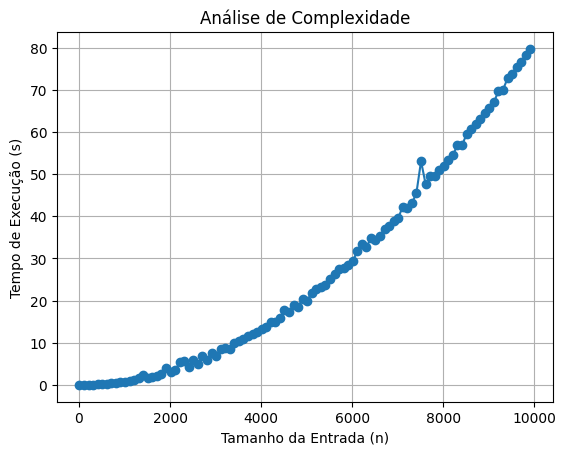

In [10]:
# Intervalo de tamanhos de entrada (n)
## para range(10, 1001, 1) ~4min de espera
## para range(10, 10001, 100) ~45min de espera
entradas = range(10, 1001, 1)

# Tempo gasto para cada tamanho de entrada
tempos = [algo_1_dumb(n, seed=50) for n in entradas]

# Plotting
plt.plot(entradas, tempos, marker='o')
plt.xlabel('Tamanho da Entrada (n)')
plt.ylabel('Tempo de Execução (s)')
plt.title('Análise de Complexidade')
plt.grid(True)
plt.show()

### Usando divisão e conquista

In [4]:
print('Solução usando divisão e conquista')

Solução usando divisão e conquista
